In [1]:
from linear_algebra import Vector, dot


def sum_of_squares(v: Vector) -> float:
    """Computes the sum of squared elements in v"""
    return dot(v, v)


[5, 7, 9]
[1, 2, 3]
[16, 20]
[2, 4, 6]
[3.0, 4.0]
32
14
5.0
2.8284271247461903
2.8284271247461903
(2, 3)
Display the first row of A
[1, 2, 3]
Display the second row of A
[4, 5, 6]
Display the first column of A
[1, 4]
Display the second column of A
[2, 5]
Display the third column of A
[3, 6]
[[1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 0, 1]]


In [3]:
from typing import Callable

def difference_quotient(f: Callable[[float], float], x: float, h: float) -> float:
    return (f(x + h) - f(x)) / h

In [4]:
def square(x: float) -> float:
    return x * x

In [5]:
def derivative(x: float) -> float:
    return 2 * x

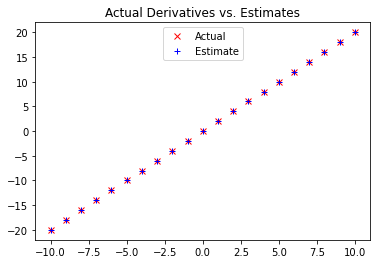

In [6]:
import matplotlib.pyplot as plt
xs = range(-10, 11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h=0.001) for x in xs]

# plot to show they're basically the same
plt.title("Actual Derivatives vs. Estimates")
plt.plot(xs, actuals, 'rx', label='Actual')  # red x
plt.plot(xs, estimates, 'b+', label='Estimate')  # blue +
plt.legend(loc=9)
plt.show()


In [7]:
def partial_difference_quotient(f: Callable[[Vector], float],
                                v: Vector,
                                i: int,
                                h: float) -> float:

    """Returns the i-th partial difference quotient of f at v"""
    w = [v_j + (h if j == i else 0)  # add h to just the ith element of v
         for j, v_j in enumerate(v)]
    return (f(w) - f(v)) / h


In [8]:
def estimate_gradient(f: Callable[[Vector], float],
                      v: Vector,
                      h: float = 0.0001):

    return [partial_difference_quotient(f, v, i, h)
        for i in range(len(v))]


In [9]:
import random
from linear_algebra import distance, add, scalar_multiply

def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    """Moves `step_size` in the `gradient` direction from `v`"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]

# pick a random starting point
v = [random.uniform(-10, 10) for i in range(3)]
for epoch in range(1000):
    grad = sum_of_squares_gradient(v) # compute the gradient at v
    v = gradient_step(v, grad, -0.01) # take a negative gradient step
    print(epoch, v)

print(f'Distance: {distance(v, [0, 0, 0])}')
if distance(v, [0, 0, 0]) < 0.001: # v should be close to 0
    print("Success!")
else:
    print("Failed!")


0 [-0.579044495826547, -9.370445808427105, 0.12820267659369886]
1 [-0.5674636059100161, -9.183036892258563, 0.12563862306182488]
2 [-0.5561143337918157, -8.999376154413392, 0.12312585060058838]
3 [-0.5449920471159794, -8.819388631325124, 0.12066333358857662]
4 [-0.5340922061736598, -8.64300085869862, 0.11825006691680508]
5 [-0.5234103620501867, -8.470140841524648, 0.11588506557846898]
6 [-0.5129421548091829, -8.300738024694155, 0.1135673642668996]
7 [-0.5026833117129993, -8.134723264200272, 0.11129601698156161]
8 [-0.49262964547873933, -7.972028798916266, 0.10907009664193038]
9 [-0.48277705256916453, -7.812588222937941, 0.10688869470909176]
10 [-0.47312151151778126, -7.656336458479182, 0.10475092081490993]
11 [-0.4636590812874256, -7.5032097293095985, 0.10265590239861173]
12 [-0.4543858996616771, -7.3531455347234065, 0.1006027843506395]
13 [-0.44529818166844354, -7.206082624028938, 0.09859072866362671]
14 [-0.43639221803507466, -7.061960971548359, 0.09661891409035418]
15 [-0.4276643736

In [10]:
# x ranges from -50 to 49, y is always 20 * x + 5
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]


In [11]:
def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta
    predicted = slope * x + intercept  # The prediction of the model.
    error = (predicted - y)  # error is (predicted - actual).
    squared_error = error ** 2  # We'll minimize squared error
    grad = [2 * error * x, 2 * error]  # using its gradient.
    return grad


In [12]:
from linear_algebra import vector_mean

# Start with random values for slope and intercept
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]
learning_rate = 0.001
for epoch in range(5000):
    # Compute the mean of the gradients
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
    # Take a step in that direction
    theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta

if 19.9 < slope < 20.1:
    print("Success!")
else:
    print("slope should be about 20")

if 4.9 < intercept < 5.1:
    print("Success!")
else:
    print("intercept should be about 5")


0 [32.9157859786373, -0.8963729344015958]
1 [11.379274379314516, -0.8716644025541551]
2 [25.74415232459466, -0.8685417993697323]
3 [16.16278185769599, -0.8510605634463982]
4 [22.55357344035333, -0.8431956604618095]
5 [18.290923319623868, -0.8289556957005325]
6 [21.134125190115178, -0.8190068609895076]
7 [19.237719491332186, -0.8062347220774134]
8 [20.502634864559354, -0.7953845331419264]
9 [19.65894716080577, -0.7832911292110831]
10 [20.22169895261334, -0.7720655997918552]
11 [19.84635473300711, -0.7602997696396582]
12 [20.096721093314617, -0.7489328153673718]
13 [19.929738097943783, -0.7373382286433223]
14 [20.041127350442853, -0.7259338140880919]
15 [19.96684212344053, -0.7144408191094729]
16 [20.01640186284606, -0.7030450953478135]
17 [19.98335691238633, -0.6916226032942718]
18 [20.005409316835024, -0.6802560011752969]
19 [19.990711729669865, -0.6688900798561114]
20 [20.000526386230344, -0.6575615879667294]
21 [19.993991338796395, -0.6462459384045656]
22 [19.9983615310844, -0.634959

In [13]:
from typing import TypeVar, List, Iterator

T = TypeVar('T') # this allows us to type "generic" functions
def minibatches(dataset: List[T], batch_size: int, shuffle: bool = True) -> Iterator[List[T]]:
    """Generates `batch_size`-sized minibatches from the dataset"""
    # start indexes 0, batch_size, 2 * batch_size, ...
    batch_starts = [start for start in range(0, len(dataset), batch_size)]
    if shuffle: 
        random.shuffle(batch_starts) # shuffle the batches
    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]


In [15]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]
for epoch in range(1000):
    for batch in minibatches(inputs, batch_size=20):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
        print(epoch, theta)

slope, intercept = theta

if 19.9 < slope < 20.1:
    print("Success!")
else:
    print("slope should be about 20")

if 4.9 < intercept < 5.1:
    print("Success!")
else:
    print("intercept should be about 5")


0 [16.903617967913004, 0.755083439957408]
0 [19.53799489205416, 0.6366216097619264]
0 [21.355112063906354, 0.6818467700701237]
0 [16.46978157438747, 0.8002471537063982]
0 [16.702106456057216, 0.8051164409733729]
1 [16.918870439942356, 0.8102083145474833]
1 [19.541673491811085, 0.6922615859560249]
1 [21.342671408118633, 0.7370848569310372]
1 [16.503454078556977, 0.8543670712747845]
1 [19.556777239810643, 0.9990236280685127]
2 [20.079360540992568, 1.0243112684597606]
2 [20.140517906640934, 1.0259931631844283]
2 [19.85013388500817, 1.0397024110303377]
2 [20.030951667179284, 1.0354838508939386]
2 [20.024913389329168, 1.04344383485933]
3 [20.158615706794432, 1.0503853250057738]
3 [20.14403883976421, 1.0584431700625567]
3 [19.851791782070638, 1.0722318761527643]
3 [20.63442505439545, 1.0917958616168784]
3 [18.194439862124845, 1.151000699299676]
4 [23.925880700236256, 1.0124483267331892]
4 [23.65885914164716, 1.024349310779959]
4 [20.177272221915164, 1.1823138369659327]
4 [19.91390285755123, 

In [16]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]
for epoch in range(100):
    for x, y in inputs:
        grad = linear_gradient(x, y, theta)
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta
if 19.9 < slope < 20.1:
    print("Success!")
else:
    print("slope should be about 20")

if 4.9 < intercept < 5.1:
    print("Success!")
else:
    print("intercept should be about 5")

0 [20.10631725452676, -0.29163299894912914]
1 [20.101755186222768, -0.06460201813933707]
2 [20.09738949542784, 0.15268846615224696]
3 [20.093211121566135, 0.3606563708743869]
4 [20.089212027503272, 0.559701670249132]
5 [20.085384480994293, 0.7502071772420836]
6 [20.08172115863084, 0.9325392806851975]
7 [20.078215014966183, 1.1070486507038975]
8 [20.074859312180536, 1.2740709124588072]
9 [20.071647556677185, 1.4339272907964293]
10 [20.0685736033334, 1.5869252287350906]
11 [20.065631545303912, 1.7333589794977065]
12 [20.062815702478048, 1.8735101714260534]
13 [20.060120675893682, 2.007648349865586]
14 [20.057541274252824, 2.136031495791871]
15 [20.055072543879692, 2.258906521830847]
16 [20.052709713667934, 2.3765097467670295]
17 [20.05044826149345, 2.4890673504703154]
18 [20.048283838276056, 2.596795809234883]
19 [20.04621229147495, 2.699902311942813]
20 [20.044229607586328, 2.798585157865409]
21 [20.042331999266093, 2.893034138486183]
22 [20.04051579369809, 2.9834309025098245]
23 [20.03